In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv(r"H:\Nasa Space Apps 2025\data\cleaned_data.csv")
df.head()

,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_duration,koi_depth,koi_time0bk,koi_prad,...,koi_period_err1,koi_period_err2,koi_duration_err1,koi_duration_err2,koi_depth_err1,koi_depth_err2,koi_prad_err1,koi_prad_err2,koi_steff_err1,koi_steff_err2
0,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,9.488036,2.95750,615.8,170.538750,2.26,...,2.775000e-05,-2.775000e-05,0.08190,-0.08190,19.5,-19.5,0.26,-0.15,81.0,-81.0
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,54.418383,4.50700,874.8,162.513840,2.83,...,2.479000e-04,-2.479000e-04,0.11600,-0.11600,35.5,-35.5,0.32,-0.19,81.0,-81.0
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0.000,19.899140,1.78220,10829.0,175.850252,14.60,...,1.494000e-05,-1.494000e-05,0.03410,-0.03410,171.0,-171.0,3.92,-1.31,158.0,-176.0
3,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,2.40641,8079.2,170.307565,33.46,...,2.630000e-07,-2.630000e-07,0.00537,-0.00537,12.8,-12.8,8.50,-2.83,157.0,-174.0
4,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,2.525592,1.65450,603.3,171.595550,2.75,...,3.761000e-06,-3.761000e-06,0.04200,-0.04200,16.9,-16.9,0.88,-0.35,169.0,-211.0


In [18]:
text_columns = ['kepid', 'kepoi_name', 'kepler_name', 'koi_vet_stat', 
                'koi_vet_date', 'koi_disp_prov', 'koi_comment']

In [20]:
X = X.select_dtypes(include=['number'])

In [21]:
y = df['koi_disposition']

In [22]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

In [26]:
feature_importance.head(10)

,feature,importance
0,koi_score,0.245050
16,koi_fpflag_nt,0.092546
18,koi_fpflag_co,0.061786
23,koi_duration_err2,0.048891
22,koi_duration_err1,0.046703
17,koi_fpflag_ss,0.044244
6,koi_ror,0.039932
5,koi_prad,0.036777
7,koi_dor,0.032550
28,koi_steff_err1,0.029355


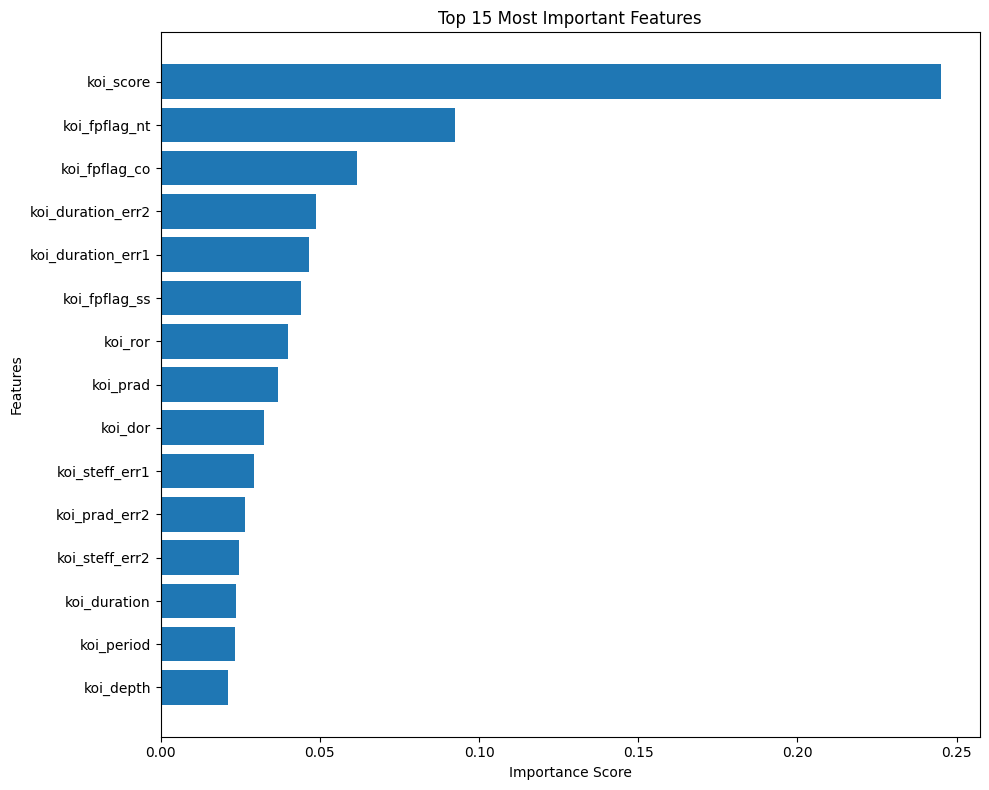

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()